## Useless Library

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# some libs from kaggle
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras import utils

from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping

# NLP
import gensim
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

stop_id = pd.read_csv("https://raw.githubusercontent.com/irfandythalib/python-indonesia-stopwords-remover/main/tala-stopwords-indonesia.txt", header=None)[0].to_list()

In [2]:
# To display all content of dataframe (no truncation)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

## We do what?
DEALING with the DATA
- btw, only 800 contain political hoax, the rest aren't really politics. from all, 3k 20-100 words, 2k 100-400, 0.4k more than 400 words  
- make it ~ distributions
- maybe 1k or 2k non hoax dataset for more than 100 words
- hoax politik only what>  



1. [kaggle notebook](https://www.kaggle.com/code/irdazh/well-it-s-the-data)  
  trying to get the suitable dataset, which is waaaaaaaaaay too hard. and what for tho.  
2. more on dataset
  1. [cnn and tempo](https://www.kaggle.com/datasets/azizainunnajib/indonesia-news?select=tempo.csv)
  2. [non hoax news](https://www.kaggle.com/datasets/iqbalmaulana/indonesian-news-dataset) &rarr; we might use summarized non hoax data -> so the model not biased towards shorter text. **I guess this one worth the effort?**
  3. [add teknologi and olahrage non hoax news](https://www.kaggle.com/datasets/vijayandika/hoax-news-indonesia?select=detik.csv)


references for the side quest -- probably
1. [LDA things](https://www.kaggle.com/models/p-tech/pttem-text-analytics)
2. [sentiment](https://www.kaggle.com/datasets/azisfata/indonesia-summary-sentiment) &rarr; we can use negatif (kontra), positif (pro), netral
3. [another sentiment](https://www.kaggle.com/datasets/deniyulian/sentiment-analysis)

## Read the Data

In [3]:
urlx = 'https://drive.google.com/uc?id=1t-Kfv4kEnO41nXJ0hdnL_7tIBhSg_xLi'
df = pd.read_csv(urlx, sep=",", encoding="utf-8")

df.columns = ['Content', 'Label', "ntoken"]
df["Content"] = df.Content.apply(lambda x: " ".join(x.split()))

In [4]:
df.info()
df.Label.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7075 entries, 0 to 7074
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  7075 non-null   object
 1   Label    7075 non-null   int64 
 2   ntoken   7075 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 165.9+ KB


Label
1    4382
0    2693
Name: count, dtype: int64

## Detailed Instances

In [5]:
df[df.Label == 1].iloc[:5]

Content  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Hakim Wahyu Iman Santoso Alami Kecelakaan Tunggal Usai Vonis Mati Ferdy Sambo ini bener gasih?? Ya Allah gimna keadaan pa hakim? Ini bener gasih aku dpt infonya dari metro.com di google   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              MEGAWATI DAN PUAN BERMAIN SLOT Nenek lampir pemimpin partai banteng bercula satu lagi main slot bersama anaknya kang matiin mic Kapan lu tobat nek Semoga om ganjar keluar dari partainya nenek lampir partai banteng bercula satu #Cuma orang goblok yang mau jadi babunya nenek lampir partai banteng bercula satu   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [6]:
df[df.Label==0].iloc[:5]

Content  \
4381                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Komisioner KPU Dilantik 11 April, KSP Pastikan Tak Ganggu Pemilu 2024 Muhaimin Iskandar alias Cak Imin.Pelantikan para penyelenggara pemilu juga berkaitan dengan pembahasan anggaran pemilu yang menjadi. Anggaran Pemilu 2024 dijadikan alasan sejumlah pejabat hendak menunda pemilu.Ketua DPR Puan Maharani mengatakan pembahasan anggaran pemilu akan dimulai usai pelantikan para penyelenggara pemilu. Dia memastikan DPR akan mendukung kepastian penyelenggaraan Pemilu 2024. (dmi/pmg)   
4382                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Baleg DPR Targetkan Rampung Bahas RUU TPKS 5 April pertama kali pada 2012 silam. Setelah ramai tekanan mendesak pengesahan RUU itu di balik makin maraknya kekarasan dan pelecehan seksual yang menyita perhatian publik pada 2021 silam, akhirnya RUU itu kembali masuk ke Prolegnas. Namun, namanya diubah dari RUU PKS jadi RUU TPKS. (mts/kid)   
4383                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               PPP Protes Fasilitas Isolasi Covid DPR di Hotel Bintang 3 membayar biaya perawatan saya dan istri selama 14 hari ratusan juta rupiah," kata dia. Indra beralasan fasilitas isoman diberikan karena anggota DPR memiliki mobilitas tinggi di daerah pemilihan mereka. Ia mengatakan bahwa fasilitas isolasi sebelumnya di wilayah Kalibata, Jakarta Selatan mendapat komplain karena berpotensi menularkan ke penghuni kompleks parlemen lainnya. (rzr/kid)   
43

## Reference Here
1. [Approaching NLP in Kaggle Compet](https://www.kaggle.com/code/abhishek/approaching-almost-any-nlp-problem-on-kaggle)
2. [Some NLP Series on Medium](https://medium.com/@mervebdurna/introduction-to-nlp-80f21a11c03d)
3. [Yes, a series](https://github.com/mervebdurna/10-days-NLP-blog-series)
3. We still need some valid datasets
5. [Indonesian Fast text](https://structilmy.com/blog/2019/04/15/word-embedding-bahasa-indonesia-menggunakan-fasttext-part-1/)
6. [Dataset 1](https://huggingface.co/datasets/indonlp/indonlu)
7. [Dataset 2](https://www.tensorflow.org/datasets/community_catalog/huggingface/id_nergrit_corpus)

## Split the data & Viz

In [7]:
dftr, dfva = train_test_split(df, test_size=0.2, random_state=0, stratify=df.Label)
dfva, dfte = train_test_split(dfva, test_size=0.5, random_state=0, stratify=dfva.Label)

"apak" not in stop_id

True

count    5660.000000
mean      140.314841
std       112.191465
min        21.000000
25%        53.000000
50%        97.000000
75%       195.000000
max       597.000000
Name: counts, dtype: float64

count    3506.000000
mean      148.115231
std       118.404661
min        24.000000
25%        51.000000
50%       114.000000
75%       207.000000
max       597.000000
Name: counts, dtype: float64

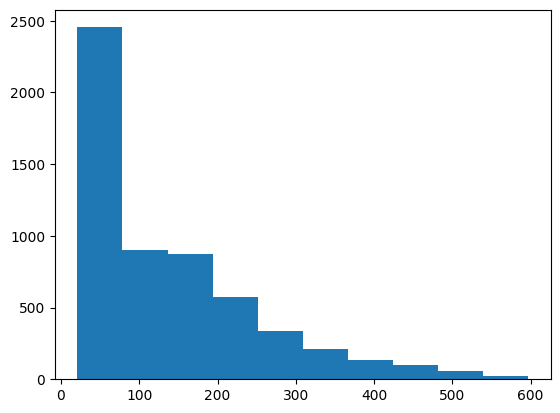

In [8]:
# Relevant text normalization processes -> lowercase, tokenize, rm punc. rm stop_id
regexp = RegexpTokenizer("[\w']+")

def remove_stop(text):
  token = regexp.tokenize(text)
  res = [k for k in token if k.lower() not in stop_id]
  return " ".join(res)

def convert_to_lowercase(text): return text.lower()
def remove_punctuation(text):
  punct_str = string.punctuation
  return text.translate(str.maketrans("", "", punct_str))

def text_preprocess(text):
  text = convert_to_lowercase(text)
  text = remove_punctuation(text)
  return text

dftr1 = dftr.copy()
dfva1 = dfva.copy()
dfte1 = dfte.copy()

for f in [dftr1, dfva1, dfte1]:
  f["Content"] = f["Content"].apply(text_preprocess)
  f["tokens"] = f["Content"].apply(regexp.tokenize)


# ML semua.
uji_token = regexp.tokenize(text_preprocess("ini uji coba bisa gak ya ini isinya hoaks ayo makan barengn klasifikasi"))

plt.hist(dftr1.tokens.apply(lambda x: len(x)))

temp = dftr1.copy()
temp["counts"] = dftr1.tokens.apply(lambda x: len(x))

display(temp.counts.describe(), temp.counts[temp.Label==1].describe())

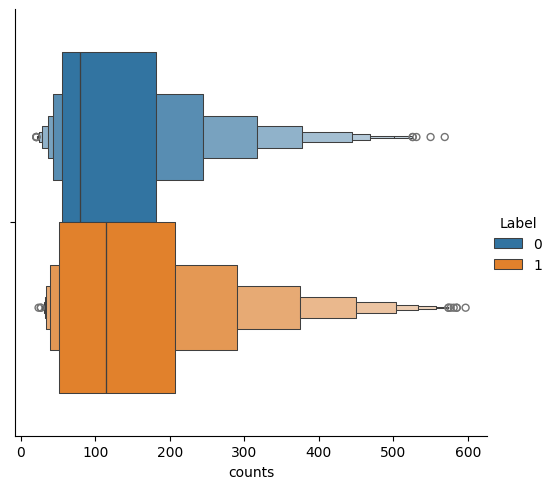

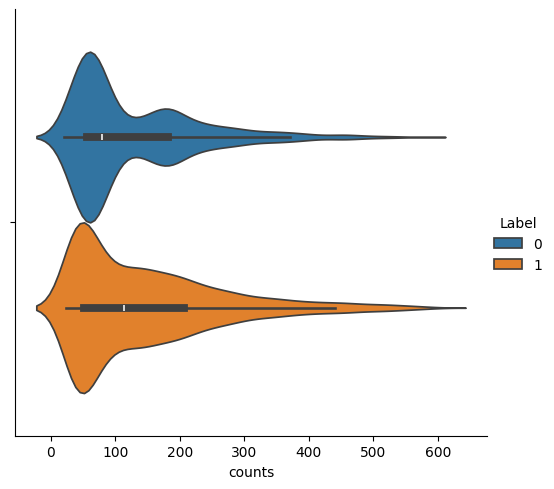

In [9]:
sns.catplot(temp, x="counts", hue="Label", kind="boxen")
sns.catplot(temp, x="counts", hue="Label", kind="violin")

In [28]:
# there are 20k words okay.
dftr1["tokens"].explode().value_counts().to_frame().T

tokens   yang    dan     di  dengan  dari  tersebut   itu  untuk  tidak   ini  dalam  pada   ada  \
count   18950  15391  15091    7725  7175      6645  6577   6236   6193  6184   6026  5944  3872   

tokens    ke  akan  oleh  bahwa  juga  indonesia  sebagai  atau  sudah  karena  partai  telah  \
count   3522  3427  3277   3258  3213       2831     2616  2540   2407    2369    2366   2332   

tokens  adalah  saat  jokowi  tahun  saya  presiden  bisa  politik  orang  kata  kepada  menjadi  \
count     2331  2223    2223   2166  2082      2067  1969     1928   1884  1855    1825     1785   

tokens  kita  hasil  jakarta    yg  dapat  setelah  merupakan   dia  salah  kami  lebih  mereka  \
count   1638   1580     1562  1546   1525     1509       1482  1478   1472  1368   1363    1353   

tokens  hari  ketua  hanya  seperti   tak  masyarakat  negara    ia  jadi  satu  mengatakan  \
count   1293   1271   1215     1210  1196        1175    1169  1164  1150  1144        1141   

tokens  masih  bukan  covid19   hal  terkait  anies  atas  pemerintah   the  kota  semua  \
count    1141   1129     1105  1091     1087   1063  1048        1041  1036  1024   1019   

tokens  melakukan  baru  benar  lalu  secara  belum  pemilu    1  masuk  jika  banyak  umum  \
count         997   990    989   988     983    978     964  952    947   943     941   931   

tokens  namun    2  dilakukan  pernah  dunia  agar  pihak  sebuah  beberapa  rumah  harus  hingga  \
count     929  913        913     909    907   906    902     898       896    894    891     888   

tokens  sama  nama  para  anda  terjadi  prabowo  warga  demikian  lain  bagi  seorang  2024  \
count    882   881   880   876      872      851    847       824   822   821      820   819   

tokens  2020  memiliki  virus  menyatakan  calon  pun  sosial  maka  anak  menteri  kalau  \
count    817       816    811         810    801  800     785   783   776      776    776   

tokens  tentang  gubernur  selain  lagi  diketahui  kepala  penelusuran  terhadap  dua  persen  \
count       775       767     767   762        762     759          755       749  744     739   

tokens  seluruh  2022    3  memberikan  resmi  baik  vaksin  serta  nomor  sampai  korban  air  \
count       738   736  736         735    726   724     722    717    714     706     700  699   

tokens  saja  tapi  selama  kesehatan  kerja  tengah  pdip  soal  ujar  sangat  anggota   pt  \
count    697   695     693        690    687     675   673   670   667     664      662  658   

tokens  besar  waktu  apa  2021  daerah  dki   of  dpr  meninggal  menggunakan  jawa  uang  wakil  \
count     649    648  640   635     634  628  625  624        623          618   615   609    600   

tokens  2019  islam  kali  jalan  pak  rakyat  kabar  jangan  langsung  kasus  sedang   ya  \
count    600    599   595    588  587     586    579     574       574    568     568  567   

tokens  bersama  membuat  corona  tanggal  kemudian  tetap    a  mengenai  berikut  polisi  \
count       563      553     550      550       547    543  538       537      534     527   

tokens  sehingga  bulan  sakit  china  bagian  mau  pertama  berjudul  meminta  mulai  pilpres  \
count        522    521    520    519     518  516      513       513      512    507      503   

tokens  ganjar  kembali  barat  sejumlah  ketika   rp  demokrat  acara  luar  baswedan  dana  \
count      502      500    495       494     491  491       490    488   485       480   480   

tokens  berbagai  nasional  capres  judul  pernyataan   to  memang  sejak  sebanyak  sebelumnya  \
count        478       478     477    474         473  472     471    469       468         468   

tokens  nasdem  kpu  juta  isu  and  suara  tni  ingin  terdapat   dr   in  bantuan  antara    4  \
count      467  466   463  462  461    456  454    454       453  452  451      451     450  449   

tokens  diri  palsu   ri  keluarga  termasuk  senin  2018  mendapat  masa  sebab  hukum  koalisi

## Finally, DNN
**Use coursera as a pointer**
1. architecture to try: sequential of dense, batchnormalization, dense, dropout, batchnormalization, and dense
2. using keras tokenizer to use lstm &rarr; well, must be padded first, you know
  1. getting the embedded word via wordvec.
  2. train
  3. architecture &rarr; embedding of the word index, spatial do, lstm, dense, do, dense, do, and dense
  3. early stopping is not recommended
4. try bi lstm
4. try gru
5. try cnn
6. not yet &rarr; try stemming and lemmatization


idk, maybe useful
- [subword tokenizer](https://www.tensorflow.org/text/guide/tokenizers)
- [and what is this?](https://www.tensorflow.org/text/api_docs/python/text/FastWordpieceTokenizer)



# Show this.
Oke? so, here we go -- remove \n \xa0 and else -> remove non alpha character -> remove what? idk dude. okay -> hari, bulan, maybe they

## Week 3 L4
Use this instead!  
The accuracy is oscillating between 80-90.


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [12]:
vocab_size = 3000
max_length = 200
oov_tok = "<OOV>"

# Define input sentences -> using preprocessed or not is really not much different.
sen_tr = dftr.Content.to_list() #str.translate(str.maketrans("", "", '0123456789\n')).to_list()
sen_va = dfva.Content.to_list()  #str.translate(str.maketrans("", "", '0123456789\n')).to_list()
sen_te = dfte.Content.to_list() #str.translate(str.maketrans("", "", '0123456789\n')).to_list()

lab_tr = np.array(dftr.Label)
lab_va = np.array(dfva.Label)
lab_te = np.array(dfte.Label)

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sen_tr)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)

# Generate list of token sequences
seq_tr = tokenizer.texts_to_sequences(sen_tr)
seq_va = tokenizer.texts_to_sequences(sen_va)
seq_te = tokenizer.texts_to_sequences(sen_te)


# Print the result
print("\nWord Index = " , word_index)
print("\nSequences = " , seq_tr)

# Pad the sequences to a uniform length
pad_tr = pad_sequences(seq_tr, maxlen=max_length, padding='post', truncating='post',)
pad_va = pad_sequences(seq_va, maxlen=max_length, padding='post', truncating='post',)
pad_te = pad_sequences(seq_te, maxlen=max_length, padding='post', truncating='post',)


# Print the result
print("\nPadded Sequences:")
print(pad_tr)
print(pad_va)

{'<OOV>': 1, 'yang': 2, 'dan': 3, 'di': 4, 'dengan': 5, 'dari': 6, 'tersebut': 7, 'itu': 8, 'ini': 9, 'untuk': 10, 'tidak': 11, 'dalam': 12, 'pada': 13, 'ada': 14, 'ke': 15, 'akan': 16, 'oleh': 17, 'bahwa': 18, 'juga': 19, 'indonesia': 20, 'sebagai': 21, 'atau': 22, 'partai': 23, 'sudah': 24, 'karena': 25, 'telah': 26, 'jokowi': 27, 'adalah': 28, 'saat': 29, 'tahun': 30, 'orang': 31, 'saya': 32, 'presiden': 33, 'bisa': 34, 'politik': 35, 'kata': 36, 'kepada': 37, 'menjadi': 38, '1': 39, 'kita': 40, 'dia': 41, 'jakarta': 42, 'hasil': 43, 'yg': 44, 'setelah': 45, 'dapat': 46, '2': 47, '19': 48, 'salah': 49, 'merupakan': 50, 'kami': 51, 'lebih': 52, 'mereka': 53, 'covid': 54, 'hari': 55, 'com': 56, 'ketua': 57, 'negara': 58, '3': 59, 'hal': 60, 'tak': 61, 'hanya': 62, 'seperti': 63, 'ia': 64, 'jadi': 65, 'masyarakat': 66, 'satu': 67, 'masih': 68, 'mengatakan': 69, 'bukan': 70, 'benar': 71, 'anies': 72, 'terkait': 73, 'kota': 74, 'baru': 75, 'pemerintah': 76, 'atas': 77, 'the': 78, 'lalu':

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Padded Sequences:
[[  27 2533  110 ...    0    0    0]
 [ 516   94    1 ...    0    0    0]
 [ 653 1719 1618 ...    0    0    0]
 ...
 [ 113    1    1 ... 2500    2   50]
 [   1    1    2 ...    0    0    0]
 [  27    1    1 ...    0    0    0]]
[[ 368    1  158 ...    0    0    0]
 [2641 2852    1 ... 2852  688    1]
 [   1    1 1544 ...    0    0    0]
 ...
 [ 944  188   54 ...    0    0    0]
 [ 113 1180 2889 ...    0    0    0]
 [2472 2508    1 ...  140 1500    4]]


In [13]:
# plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# dimension
NUM_EPOCHS = 10
BATCH_SIZE = 32

In [14]:
# Parameters
embedding_dim = 16
dense_dim = 8

# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_flatten.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),optimizer='adam',
                      metrics=tf.keras.metrics.AUC(from_logits=False, name="auc"))

# Print the model summary
model_flatten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           48000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 51201 (200.00 KB)
Trainable params: 51201 (200.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
177/177 [==============================] - 5s 13ms/step - loss: 0.5225 - auc: 0.8382 - val_loss: 0.3170 - val_auc: 0.9653
Epoch 2/10
177/177 [==============================] - 1s 8ms/step - loss: 0.1952 - auc: 0.9882 - val_loss: 0.1684 - val_auc: 0.9870
Epoch 3/10
177/177 [==============================] - 1s 4ms/step - loss: 0.0978 - auc: 0.9969 - val_loss: 0.1324 - val_auc: 0.9907
Epoch 4/10
177/177 [==============================] - 1s 4ms/step - loss: 0.0608 - auc: 0.9987 - val_loss: 0.1166 - val_auc: 0.9919
Epoch 5/10
177/177 [==============================] - 1s 4ms/step - loss: 0.0402 - auc: 0.9994 - val_loss: 0.1107 - val_auc: 0.9923
Epoch 6/10
177/177 [==============================] - 1s 4ms/step - loss: 0.0275 - auc: 0.9998 - val_loss: 0.1082 - val_auc: 0.9926
Epoch 7/10
177/177 [==============================] - 1s 5ms/step - loss: 0.0190 - auc: 0.9999 - val_loss: 0.1070 - val_auc: 0.9927
Epoch 8/10
177/177 [==============================] - 1s 4ms/step - loss: 0

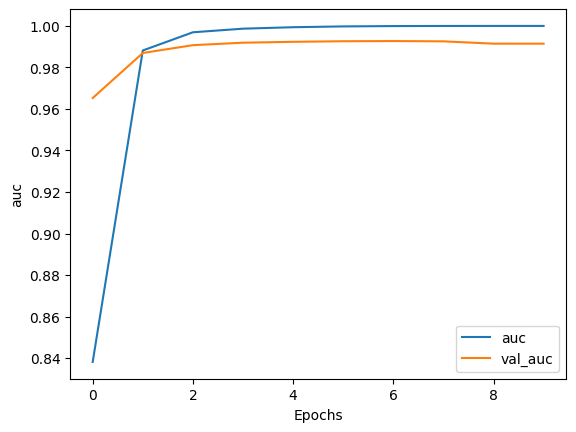

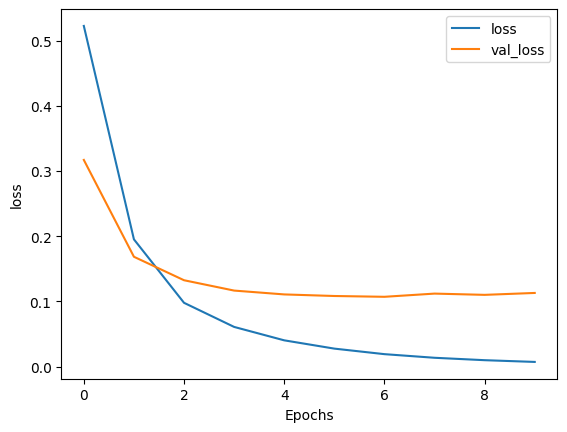

In [15]:
# Train the model
history_flatten = model_flatten.fit(pad_tr, lab_tr, epochs=NUM_EPOCHS, validation_data=(pad_va, lab_va))

# Plot the accuracy and loss history
plot_graphs(history_flatten, 'auc')
plot_graphs(history_flatten, 'loss')

#  - loss: 0.0751 - auc: 0.9992 - val_loss: 0.2143 - val_auc: 0.9753

## Evaluation & Thresholding.

23/23 [==============================] - 0s 2ms/step


0.9703389830508474

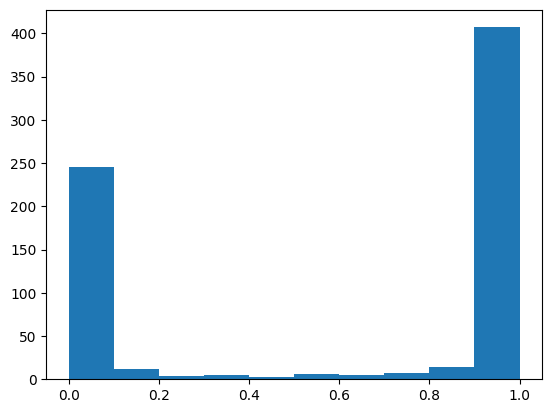

In [16]:
plt.hist(model_flatten.predict(pad_te))
metrics.accuracy_score(lab_te, model_flatten.predict(pad_te)>0.5)

23/23 [==============================] - 0s 2ms/step
[0.90381895]


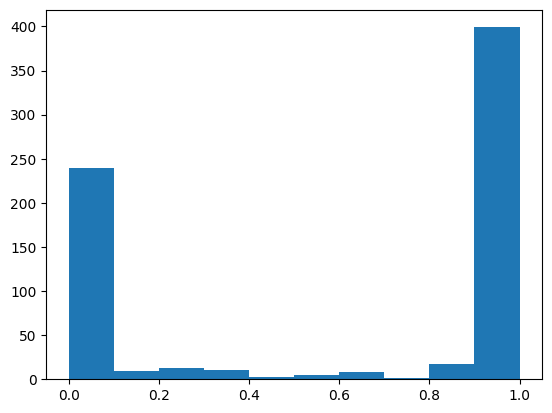

In [17]:
probs = model_flatten.predict(pad_va)
plt.hist(probs)

# too good to be true. 10% is swayed one.
print(sum((probs>0.9)|(probs<0.1))/len(pad_va))

In [18]:
# accuracy, precision, recall, f1score, fbetascore -- 2 and 1 0.05 -- 0.95
def eval_metrics(ytrue, probs, thr = np.arange(0.02, 0.98, 0.01)):

  f_thr = thr
  f_metrics = pd.DataFrame(f_thr, columns=["thr"])

  f_metrics["acc"] = f_metrics.thr.apply(lambda x: metrics.accuracy_score(ytrue, probs>x))
  f_metrics["pre"] = f_metrics.thr.apply(lambda x: metrics.precision_score(ytrue, probs>x))
  f_metrics["rec"] = f_metrics.thr.apply(lambda x: metrics.recall_score(ytrue, probs>x))
  f_metrics["f05"] = f_metrics.thr.apply(lambda x: metrics.fbeta_score(ytrue, probs>x, beta=0.5))
  f_metrics["f10"] = f_metrics.thr.apply(lambda x: metrics.fbeta_score(ytrue, probs>x, beta=1))
  f_metrics["f20"] = f_metrics.thr.apply(lambda x: metrics.fbeta_score(ytrue, probs>x, beta=2))

  thr1 = [f_metrics.loc[np.argmax(f_metrics.f20),"thr"],
         f_metrics.loc[np.argmax(f_metrics.f05),"thr"]]

  return f_metrics, thr1

In [19]:
f_metrics, thr1 = eval_metrics(lab_va, probs)
thr1

[0.06, 0.8299999999999998]

In [20]:
print(f_metrics.loc[np.argmax(f_metrics.f10),:])

eval_metrics(lab_te, model_flatten.predict(pad_te), thr1)

thr    0.310000
acc    0.957567
pre    0.959459
rec    0.972603
f05    0.962060
f10    0.965986
f20    0.969945
Name: 29, dtype: float64
23/23 [==============================] - 0s 2ms/step


(    thr       acc       pre       rec       f05       f10       f20
 0  0.06  0.943503  0.923404  0.990868  0.936152  0.955947  0.976598
 1  0.83  0.957627  0.985714  0.945205  0.977337  0.965035  0.953039,
 [0.06, 0.8299999999999998])

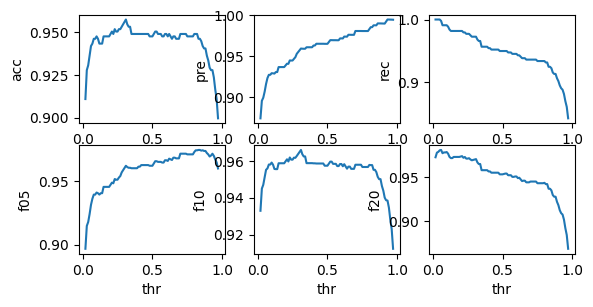

In [21]:
for i, k in enumerate(f_metrics.columns[1:]):
  plt.subplot(3,3,i+1)
  ax = sns.lineplot(f_metrics, x="thr", y=k)

## Deployment.
1. Preprocess Pipeline
  1. Clean
  2. Tokenize
  3. Optional: into tf-idf
2. Modeling

### Save preprocess things.

In [22]:
import pickle

In [23]:
# save tokenizer
with open('tokenizer.pkl', 'wb') as f:
  pickle.dump(tokenizer, f)

# save model
model_flatten.save('flatten.h5')

# convert to tflite
con_flatten = tf.lite.TFLiteConverter.from_keras_model(model_flatten)
flatten_lite = con_flatten.convert()

with open('flatten.tflite', 'wb') as f:
  f.write(flatten_lite)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import os
dir0 = '/content'

for i, k in enumerate(os.listdir()):
  path = os.path.join(dir0, k)
  print(k, round(os.path.getsize(path)/1024/1024, 3), "MB")

.config 0.004 MB
tokenizer.pkl 1.88 MB
flatten.h5 0.612 MB
flatten.tflite 0.197 MB
sample_data 0.004 MB


### Load tokenizer, model

In [25]:
# load tokenizer
with open('/content/tokenizer.pkl', 'rb') as f:
  penoken = pickle.load(f)

# load model
int_flatten = tf.lite.Interpreter(model_path="/content/flatten.tflite")
int_flatten.allocate_tensors()

input_details = int_flatten.get_input_details()
output_details = int_flatten.get_output_details()

input_details, output_details

([{'name': 'serving_default_embedding_input:0',
   'index': 0,
   'shape': array([  1, 200], dtype=int32),
   'shape_signature': array([ -1, 200], dtype=int32),
   'dtype': numpy.float32,
   'quantization': (0.0, 0),
   'quantization_parameters': {'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32),
    'quantized_dimension': 0},
   'sparsity_parameters': {}}],
 [{'name': 'StatefulPartitionedCall:0',
   'index': 9,
   'shape': array([1, 1], dtype=int32),
   'shape_signature': array([-1,  1], dtype=int32),
   'dtype': numpy.float32,
   'quantization': (0.0, 0),
   'quantization_parameters': {'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32),
    'quantized_dimension': 0},
   'sparsity_parameters': {}}])

In [26]:
# hoax
ins = ['Informasi buat rekan2: Bagi yang punya anak TK, SD dan SMP mohon dengan hormat disampaikan kpd putra dan putrinya : bahwa tadi pagi ada kejadian di SDN 2 Kemantren selesai membeli sari buah pisang cair dg harga Rp. 2.000,-. Diduga ada kandungan narkoba. A. adapun sistem cara memakainya sbb: Cairan tsb di semprotkan pada mulut. B. Hasil / reaksi minuman tsb sbb: Segar dan nikmat selanjutnya pemakai tsb menjadi lemas dan bola mata keatas. Sekarang kasus tsb sedang dalam penyelidikan Polisi Gedeg. Penjualnya sudah pindah tempeh dan masih jadi pencarian pihak Polsek. Wis sementara sakmane sik, WASPADA!” ']

# true but hoax
# ins = ['Mantan Wakil Ketua Komisi Pemberantasan Korupsi (KPK) Saut Situmorang mengkritik pernyataan Presiden Joko Widodo bahwa persoalan yang belakangan kerap menimpa KPK bukan urusannya.Jokowi diketahui sempat menyatakan jangan apa-apa ditarik ke presiden soal urusan Tes Wawasan Kebangsaan (TWK) KPK belakangan ini.']

# hoax and hoax
# ins = ['vaksin mRNA sedang disuntikkan ke ternak. Vaksin mRNA sedang disuntikkan ke ternak dan hewan pendamping, kata Dr. Robert Malone. Artinya, jika Anda mengonsumsi hewan yang divaksinasi, vaksin mRNA masuk ke tubuh Anda']

# true but to hoax --
# ins = [" Vaksin adalah produk biologi yang diberikan kepada seseorang untuk melindunginya dari penyakit yang mele- mahkan, bahkan mengancam jiwa. 2. Vaksin akan merangsang pembentukan kekebalan terha- dap penyakit tertentu pada tubuh seseorang."]

# non hoax
# ins = ["Jokowi Mania (Joman) akan menyambangi kediaman Prabowo Subianto di Jalan Kertanegara IV, Jakarta Selatan pada sore ini, Kamis (16/2) pukul 16.00 WIB. Iya akan ke Kertanegara, kata Ketua Umum Joman Immanuel Ebenezer kepada CNNIndonesia.com.Immanuel menyebut kedatangan Joman itu untuk menyampaikan langsung dukungan kepada Prabowo di Pilpres 2024. Immanuel mengatakan dukungan itu telah disepakati secara bulat."]

# non hoax and good
# ins = ["Pencegahan Penyakit yang dipicu oleh cacing ini dapat dicegah dengan memasak pada suhu yang melebihi 60 °C atau dengan membekukannya. Food and Drug Administration (FDA) menyarankan agar semua ikan dan kerang yang dimakan mentah dibekukan pada suhu −35 °C atau lebih rendah selama 15 jam atau dibekukan pada suhu −20 °C atau lebih rendah selama tujuh hari. Marinasi dan penggaraman tidak cukup untuk membunuh parasit ini. Di Uni Eropa, terdapat regulasi yang mewajibkan semua ikan yang akan dimakan mentah untuk dibekukan sebelum dijual. Regulasi ini berhasil memberantas penyakit anisakiasis di Belanda. "]

In [27]:
seq = penoken.texts_to_sequences(ins)
pad = pad_sequences(seq, maxlen=200, padding="post", truncating='post')
pad = tf.cast(pad, tf.float32)

in_index = int_flatten.get_input_details()[0]["index"]
int_flatten.set_tensor(in_index, pad)

int_flatten.invoke()

out_index = int_flatten.get_output_details()[0]["index"]
out = int_flatten.tensor(out_index)

# so, it is not that good lol. 0 good 1 is hoax.
print(out()[0])

[0.98731345]
